# Linear Models for Regression

**Step 1: Import packages, models, and data**

In [14]:
# importing some base packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
sklearn.set_config(print_changed_only=True)

In [12]:
# import our models
from sklearn.linear_model import Ridge, LinearRegression

In [15]:
# import a cross-validation tool
from sklearn.model_selection import cross_val_score

In [6]:
# import data and split out the target
from sklearn.datasets import load_boston
boston = load_boston()

X, y = boston.data, boston.target

**Step 2: Lets do a little data exploration**

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
# 13 features
X.shape

(506, 13)

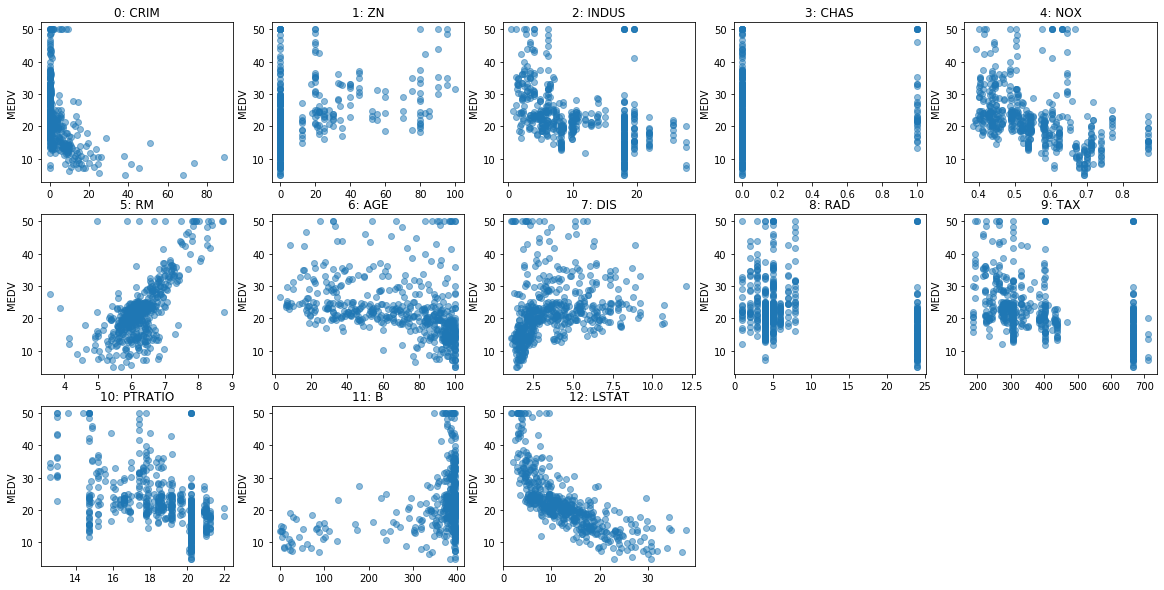

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [9]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [10]:
# train/test split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Modeling

First, we'll calculate
* The mean score of a basic Linear Regression model over 10 cross-validation folds.
* The mean score of a Ridge Regression model over 10 cross-validation folds.

In [17]:
# calculate the mean score over 10 cv folds
np.mean(cross_val_score(LinearRegression(),
                        X_train, y_train, cv=10))

0.7160133196648379

In [18]:
np.mean(cross_val_score(
        Ridge(), X_train, y_train, cv=10))

0.7140510045941364

About 71% accuracy for the most basic of models. 

Next, we'll do some **hyperparameter tuning** by using a cross-validated Grid Search to find the optimal alpha..alpha being the y-intercept.

In [20]:
# import grid search and print values being tried
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}


Now, let's run a ridge regression model across this grid of alphas and plot the results:

In [22]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

C:\Users\jfields\.conda\envs\keras-cpu\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

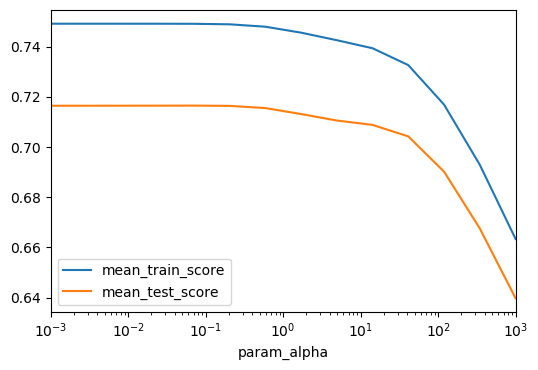

In [25]:
import pandas as pd
plt.figure(dpi=100)
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")

We see a pretty clear dropoff after $10^0$.

Now, we'll create some new polynomial features using sklearn's `PolynomialFeatures` package. This tool generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

Afterwards, we'll use the same models we did above.

In [27]:
from sklearn.preprocessing import PolynomialFeatures, scale

# being lazy and not really doing things properly whoops
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


We now have 104 features!

In [28]:
np.mean(cross_val_score(LinearRegression(),
                        X_train, y_train, cv=10))

0.8065364410547543

In [29]:
np.mean(cross_val_score(Ridge(),
                        X_train, y_train, cv=10))

0.8227099613418731

There's a clear performance boose on the test set. Grid Search time.

In [30]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

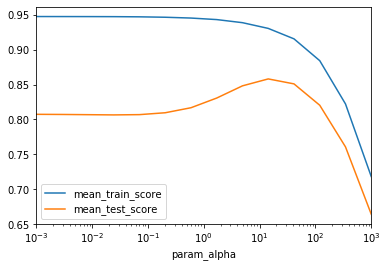

In [31]:
results = pd.DataFrame(grid.cv_results_)

results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()
plt.xscale("log")

In [32]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 14.251026703029993}
0.8580259261370746


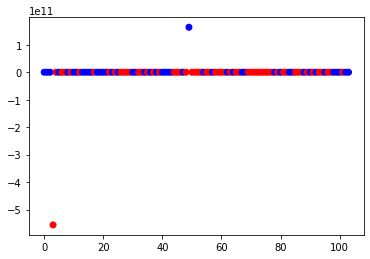

In [33]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

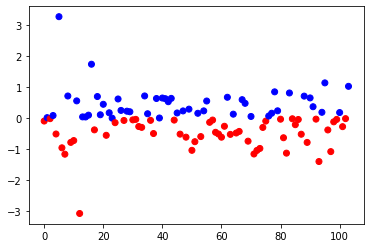

In [34]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")

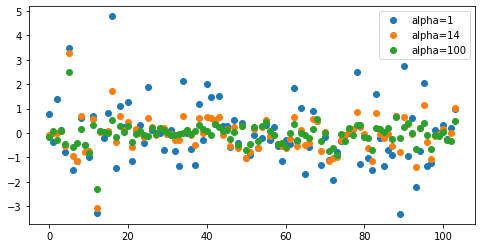

In [35]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.78
Test set score: 0.72
Number of features used: 9


# Exercise
Load the diabetes dataset using ``sklearn.datasets.load_diabetes``. Apply ``LinearRegression``, ``Ridge`` and ``Lasso`` and visualize the coefficients. Try polynomial features.

In [41]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

diabetes = load_diabetes()

X, y = diabetes.data, diabetes.target

X.shape

(442, 10)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
scores_lr = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
print("Linear regression score:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train, y_train, cv=10)
print("Ridge Regression score:", scores_ridge.mean())
scores_lasso = cross_val_score(Lasso(), X_train, y_train, cv=10)
print("Lasso Regression score:", scores_lasso.mean())

Linear regression score: 0.42418648219741356
Ridge Regression score: 0.3572495738077528
Lasso Regression score: 0.28615434649595767


Ouch! Let's try introducing some polynomial features to our data:

In [45]:
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, random_state=42)

scores_lr = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=10)
print("Linear regression score:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train_poly, y_train, cv=10)
print("Ridge Regression score:", scores_ridge.mean())
scores_lasso = cross_val_score(Lasso(), X_train_poly, y_train, cv=10)
print("Lasso Regression score:", scores_lasso.mean())

Linear regression score: 0.2839321187252982
Ridge Regression score: 0.3179811064864422
Lasso Regression score: 0.3848549542302324


Even worse!

Lastly, we'll use a cross-validated grid search to find the best parameters for Ridge and Lasso:

C:\Users\jfields\.conda\envs\keras-cpu\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 10.0} best score:  0.4269709752088845


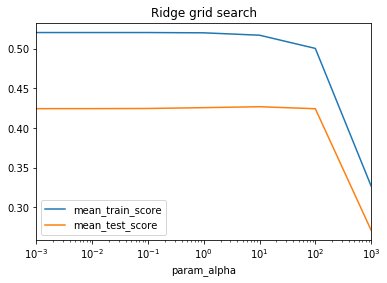

In [53]:
# Ridge Regression
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search")


print(grid.best_params_, 'best score: ', grid.best_score_)

C:\Users\jfields\.conda\envs\keras-cpu\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.1} best score:  0.42607817984952107


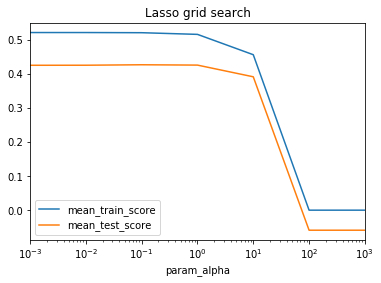

In [52]:
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid_lasso = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_lasso.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid_lasso.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Lasso grid search")
print(grid_lasso.best_params_, 'best score: ', grid_lasso.best_score_)